## Calculate bottom pressure timeseries along with velocity away from and over ridge

In [1]:
from matplotlib import rc
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
import shutil
os.chdir("/home/149/ab8992/bottom_near_inertial_waves/automate_experiments")

import autolib as al
from dask.distributed import Client
client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41099 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/41099/status,
Dashboard: /proxy/41099/status,Workers: 7
Total threads: 28,Total memory: 112.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35187,Workers: 7
Dashboard: /proxy/41099/status,Total threads: 28
Started: Just now,Total memory: 112.00 GiB
Comm: tcp://127.0.0.1:41259,Total threads: 4
Dashboard: /proxy/39637/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:46727,


## Look at the bottom pressure and bottom velocity along centreline of ridge

In [11]:
e5 = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-5/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = [245,255],time = slice(0,1500),xh = 5).load()

e8 = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-8/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = [245,255],time = slice(0,1500),xh = 5).load()

e3 = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-3/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = [245,255],time = slice(0,1500),xh = 5).load()

## Timeseries of all isopycnal height anomalies

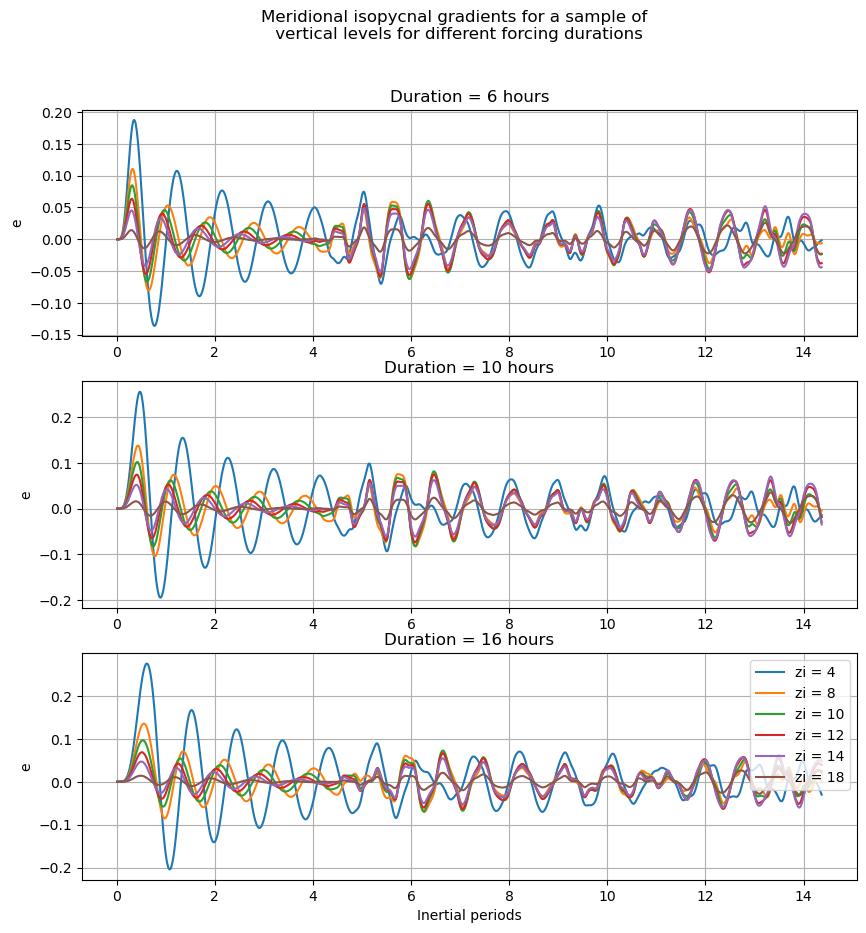

In [15]:
# Single figure containing every zi level of the e_far dataarray
tcoords = e3.time.values/(60 * 17.4)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for j,e in enumerate([
    e3.assign_coords({"time":tcoords}),
    e5.assign_coords({"time":tcoords}),
    e8.assign_coords({"time":tcoords})]):
    for i in [4,8,10,12,14,18]:
        (e.isel(yh = 0) - e.isel(yh = 1)).isel(zi = i).plot(label='zi = ' + str(i),ax = ax[j])

    ax[j].set_xlabel('')
    ax[j].set_title("")
    ax[j].grid()
fig.suptitle("Meridional isopycnal gradients for a sample of \n vertical levels for different forcing durations")

# Put grid lines on axes





ax[0].set_title("Duration = 6 hours")
ax[1].set_title("Duration = 10 hours")
ax[2].set_title("Duration = 16 hours")

ax[-1].set_xlabel('Inertial periods')
ax[-1].legend()

## Halve xextent to see if second set of high amplitude oscillations are because of boundary

load u
load v
load e
load u
load v
load e


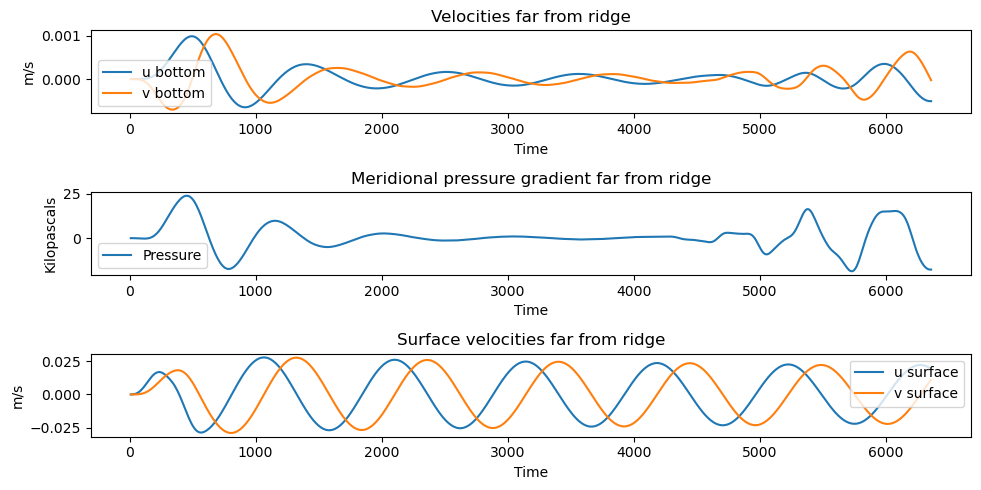

In [7]:
e = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/test_short_xextent/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = [245,255])
u = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/test_short_xextent/archive/output00*/u_10min.nc",decode_times=False,decode_cf=False).u.isel(yh = slice(249,251)).mean('yh')
v = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/test_short_xextent/archive/output00*/v_10min.nc",decode_times=False,decode_cf=False).v.isel(yq = 250)
print("load u")
u_far = u.isel(xq = [5]).load()
print("load v")
v_far = v.isel(xh = [5]).load()
print("load e")
e_far = e.isel(xh = [5]).load()
print("load u")
u_ridge = u.isel(xq = [490,510]).load()
print("load v")
v_ridge = v.isel(xh = [490,510]).load()
print("load e")
e_ridge = e.isel(xh = [490,510]).load()

pressure_ridge = calculate_pressure_new(e_ridge.isel(yh = 0),u_ridge.zl) - calculate_pressure_new(e_ridge.isel(yh = 1),u_ridge.zl)
pressure_far = calculate_pressure_new(e_far.isel(yh = 0),u_far.zl) - calculate_pressure_new(e_far.isel(yh = 1),u_far.zl)



import matplotlib.pyplot as plt
import matplotlib.dates as mdates
textent = 1000
# Create a figure and two subplots side by side
fig, axs = plt.subplots(3, 1, figsize=(10, 5))

# Left plot for velocities

u_far.isel(time = slice(0,textent),zl = -1).plot(ax=axs[0], label='u bottom')
v_far.isel(time = slice(0,textent),zl = -1).plot(ax=axs[0], label='v bottom')
# axs[0].hlines(0,0,textent*10,linestyles='dashed',color = "grey")
# axs[1].hlines(0,0,textent*10,linestyles='dashed',color = "grey")
axs[0].set_xlabel('Time')
axs[0].set_ylabel('m/s')
axs[0].legend()
axs[0].set_title("Velocities far from ridge")

# Right plot for pressure
pressure_far.isel(time = slice(0,textent),zl = -1).plot(ax=axs[1], label='Pressure')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Kilopascals')
axs[1].legend()
axs[1].set_title("Meridional pressure gradient far from ridge")

u_far.isel(time = slice(0,textent),zl = 0).plot(ax=axs[2], label='u surface')
v_far.isel(time = slice(0,textent),zl = 0).plot(ax=axs[2], label='v surface')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('m/s')
axs[2].legend()
axs[2].set_title("Surface velocities far from ridge")

plt.tight_layout()
plt.show()

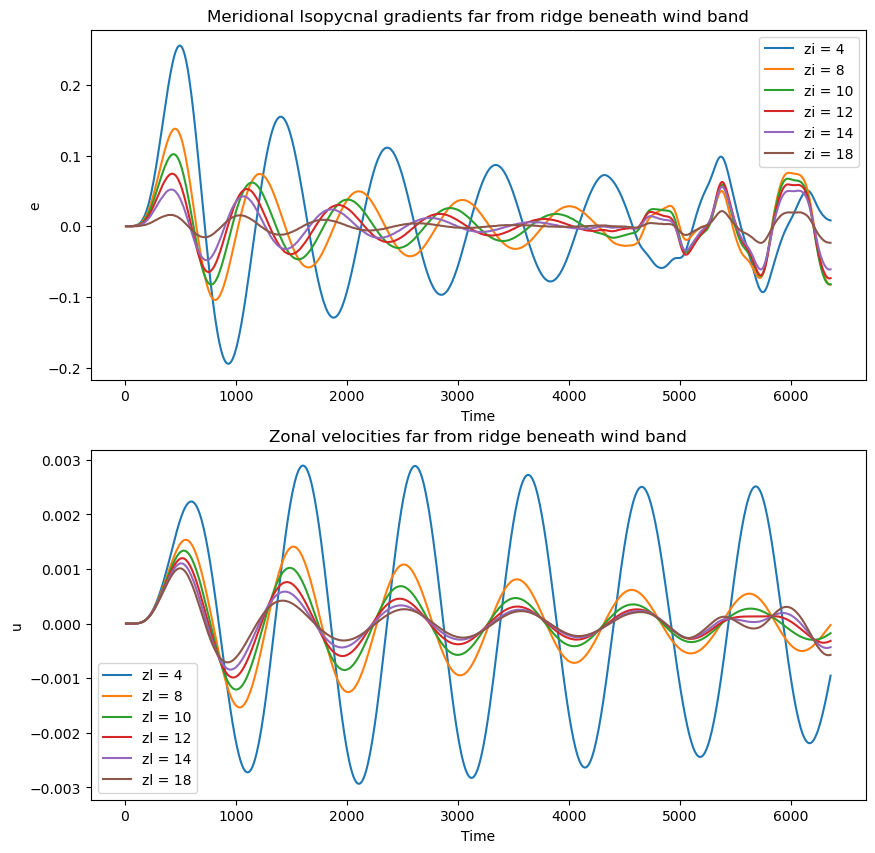

In [16]:
# Single figure containing every zi level of the e_far dataarray

e_far_amom = e_far.isel(yh = 0) - e_far.isel(yh = 1)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
# for i in range(5,20):
for i in [4,8,10,12,14,18]:
    e_far_amom.isel(time = slice(0,textent),zi = i).plot(ax=axs[0], label='zi = ' + str(i))

axs[0].set_xlabel('Time')
axs[0].set_title("Meridional Isopycnal gradients far from ridge beneath wind band")
axs[0].legend()

for i in [4,8,10,12,14,18]:
    u_far.isel(time = slice(0,textent),zl = i).plot(ax=axs[1], label='zl = ' + str(i))

axs[1].set_xlabel('Time')
axs[1].set_title("Zonal velocities far from ridge beneath wind band")
axs[1].legend()

## Plot partition of KE and PE far from ridge. Does this change with the transition period?

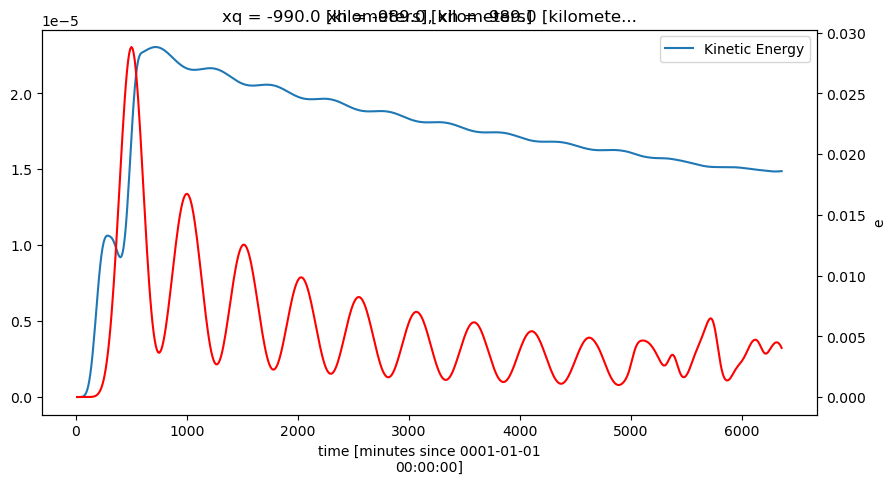

In [15]:
KE = 0.5 * (u_far**2 + v_far**2).mean("zl")
PE = (e_far_amom**2).mean("zi")

fig,ax = plt.subplots(1,1,figsize = (10,5))
ax2 = ax.twinx()
KE.plot(ax = ax,label = "Kinetic Energy")
PE.plot(ax = ax2,label = "Potential Energy",color = "red")
ax.legend()

In [ ]:
# Single figure containing every zi level of the e_far dataarray

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
# for i in range(5,20):
for i in [8,10,12,14,18]:
    u_far.isel(time = slice(0,textent),zi = i).plot(ax=axs, label='zi = ' + str(i))

axs.set_xlabel('Time')
axs.set_title("Zonal velocities gradients far from ridge beneath wind band")
axs.legend()

## Plot Hovmoller of pressure gradient

Text(0.5, 1.0, 'Isopycnal displacement under centre of wind forcing')

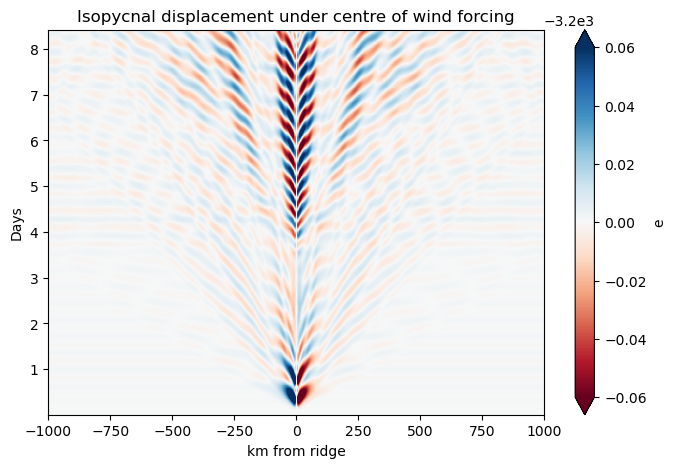

In [18]:
e = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/test_short_xextent/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = slice(249,251)).mean("yh")
e = e.assign_coords({"time":e.time.values / (60 * 24)})
plt.figure(figsize=(8,5))

e.isel(zi = -5).plot(vmin = -3.2e3 - 0.06,vmax = -3.2e3 + 0.06,cmap = "RdBu")
plt.ylabel("Days")
plt.xlabel("km from ridge")
plt.title("Isopycnal displacement under centre of wind forcing")


Text(0.5, 0.98, 'Forcing duration 6hrs. \n values under centre of wind band')

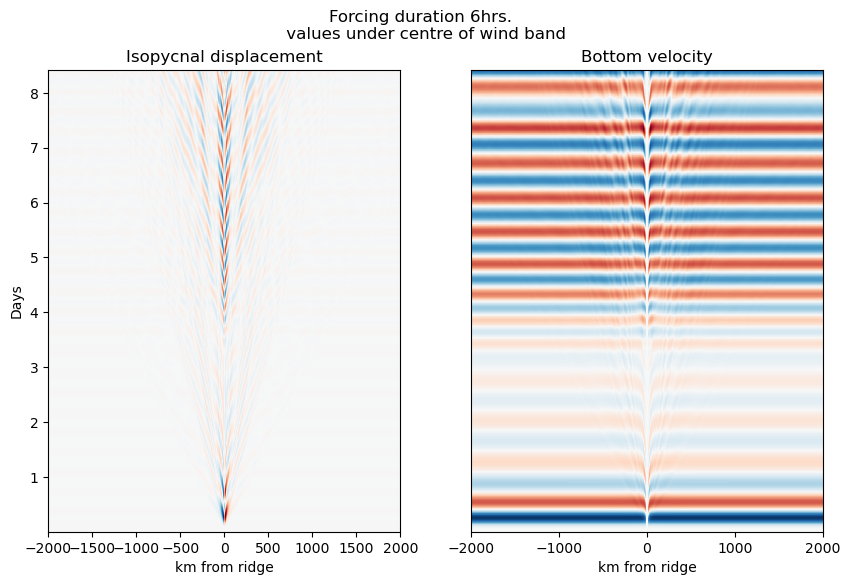

In [39]:
e = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-3/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
u = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-3/archive/output00*/u_10min.nc",decode_times=False,decode_cf=False).u.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
e = e.assign_coords({"time":e.time.values / (60 * 24)})
u = u.assign_coords({"time":u.time.values / (60 * 24)})
fig,ax = plt.subplots(1,2,figsize=(10,6))

e.isel(zi = -5).plot(cmap = "RdBu",add_colorbar = False,ax = ax[0])
u.isel(zl = -1).plot(cmap = "RdBu",ax = ax[1],add_colorbar = False)

ax[0].set_ylabel("Days")
ax[0].set_xlabel("km from ridge")
ax[0].set_title("Isopycnal displacement")
# delete yaxis
ax[1].yaxis.set_visible(False)
ax[1].set_xlabel("km from ridge")
ax[1].set_title("Bottom velocity")

fig.suptitle("Forcing duration 6hrs. \n values under centre of wind band")

Text(0.5, 0.98, 'Forcing duration 10hrs. \n values under centre of wind band\n\n')

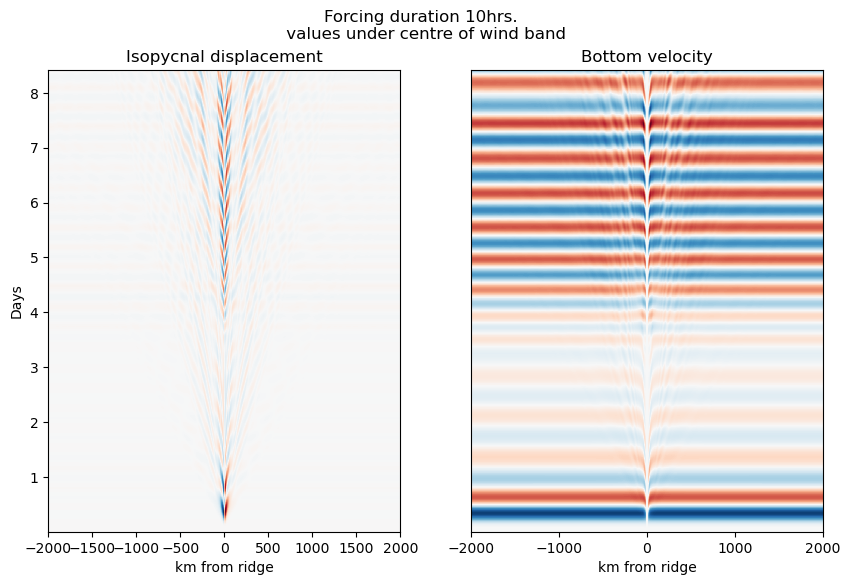

In [37]:
e = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-5/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
u = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-5/archive/output00*/u_10min.nc",decode_times=False,decode_cf=False).u.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
e = e.assign_coords({"time":e.time.values / (60 * 24)})
u = u.assign_coords({"time":u.time.values / (60 * 24)})
fig,ax = plt.subplots(1,2,figsize=(10,6))

e.isel(zi = -5).plot(cmap = "RdBu",add_colorbar = False,ax = ax[0])
u.isel(zl = -1).plot(cmap = "RdBu",ax = ax[1],add_colorbar = False)

ax[0].set_ylabel("Days")
ax[0].set_xlabel("km from ridge")
ax[0].set_title("Isopycnal displacement")
# delete yaxis
ax[1].yaxis.set_visible(False)
ax[1].set_xlabel("km from ridge")
ax[1].set_title("Bottom velocity")

fig.suptitle("Forcing duration 10hrs. \n values under centre of wind band\n\n")

Text(0.5, 0.98, 'Forcing duration 16hrs. \n values under centre of wind band')

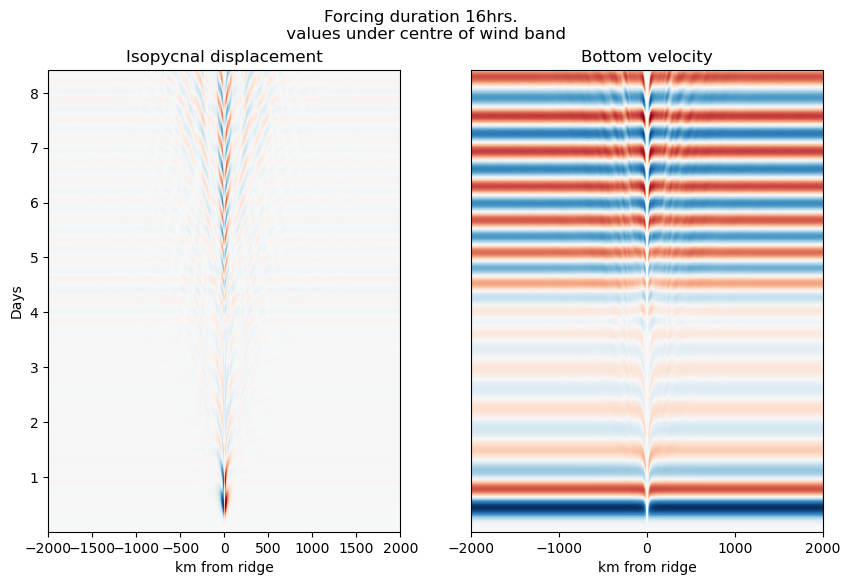

In [36]:
e = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-8/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
u = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-8/archive/output00*/u_10min.nc",decode_times=False,decode_cf=False).u.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
e = e.assign_coords({"time":e.time.values / (60 * 24)})
u = u.assign_coords({"time":u.time.values / (60 * 24)})
fig,ax = plt.subplots(1,2,figsize=(10,6))

e.isel(zi = -5).plot(cmap = "RdBu",add_colorbar = False,ax = ax[0])
u.isel(zl = -1).plot(cmap = "RdBu",ax = ax[1],add_colorbar = False)

ax[0].set_ylabel("Days")
ax[0].set_xlabel("km from ridge")
ax[0].set_title("Isopycnal displacement")
# delete yaxis
ax[1].yaxis.set_visible(False)
ax[1].set_xlabel("km from ridge")
ax[1].set_title("Bottom velocity")

fig.suptitle("Forcing duration 16hrs. \n values under centre of wind band")

Text(0.5, 0.98, 'Forcing duration Inertial period!. \n values under centre of wind band')

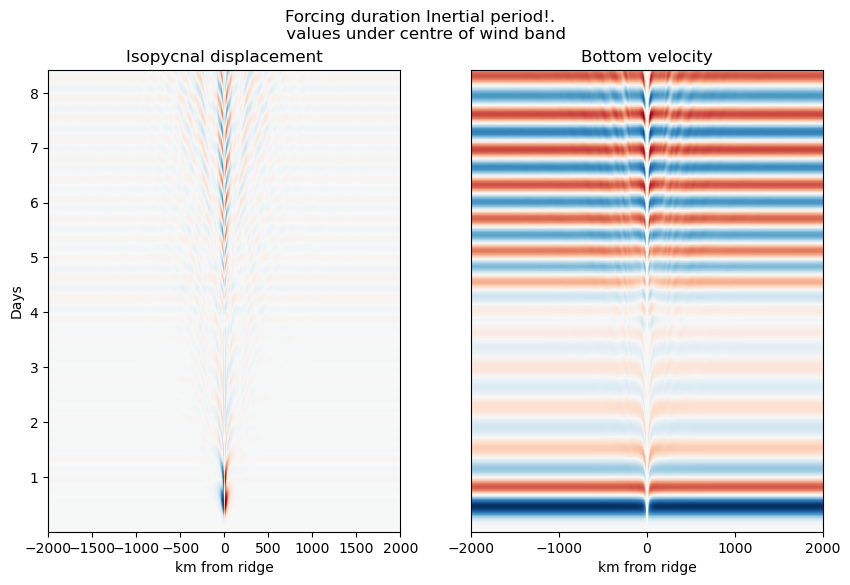

In [40]:
e = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-8.7/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
u = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-8.7/archive/output00*/u_10min.nc",decode_times=False,decode_cf=False).u.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
e = e.assign_coords({"time":e.time.values / (60 * 24)})
u = u.assign_coords({"time":u.time.values / (60 * 24)})
fig,ax = plt.subplots(1,2,figsize=(10,6))

e.isel(zi = -5).plot(cmap = "RdBu",add_colorbar = False,ax = ax[0])
u.isel(zl = -1).plot(cmap = "RdBu",ax = ax[1],add_colorbar = False)

ax[0].set_ylabel("Days")
ax[0].set_xlabel("km from ridge")
ax[0].set_title("Isopycnal displacement")
# delete yaxis
ax[1].yaxis.set_visible(False)
ax[1].set_xlabel("km from ridge")
ax[1].set_title("Bottom velocity")

fig.suptitle("Forcing duration Inertial period!. \n values under centre of wind band")

Text(0.5, 0.98, 'Forcing duration 20hrs. \n values under centre of wind band')

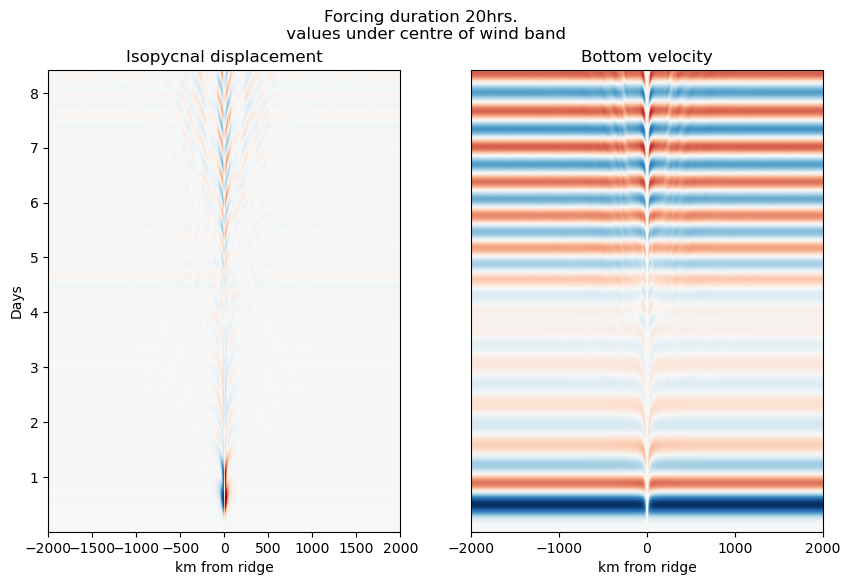

In [41]:
e = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-10/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
u = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/duration_ridge_20layer/duration_ridge_20layer_duration-10/archive/output00*/u_10min.nc",decode_times=False,decode_cf=False).u.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
e = e.assign_coords({"time":e.time.values / (60 * 24)})
u = u.assign_coords({"time":u.time.values / (60 * 24)})
fig,ax = plt.subplots(1,2,figsize=(10,6))

e.isel(zi = -5).plot(cmap = "RdBu",add_colorbar = False,ax = ax[0])
u.isel(zl = -1).plot(cmap = "RdBu",ax = ax[1],add_colorbar = False)

ax[0].set_ylabel("Days")
ax[0].set_xlabel("km from ridge")
ax[0].set_title("Isopycnal displacement")
# delete yaxis
ax[1].yaxis.set_visible(False)
ax[1].set_xlabel("km from ridge")
ax[1].set_title("Bottom velocity")

fig.suptitle("Forcing duration 20hrs. \n values under centre of wind band")

Text(0.5, 1.0, 'Bottom velocity')

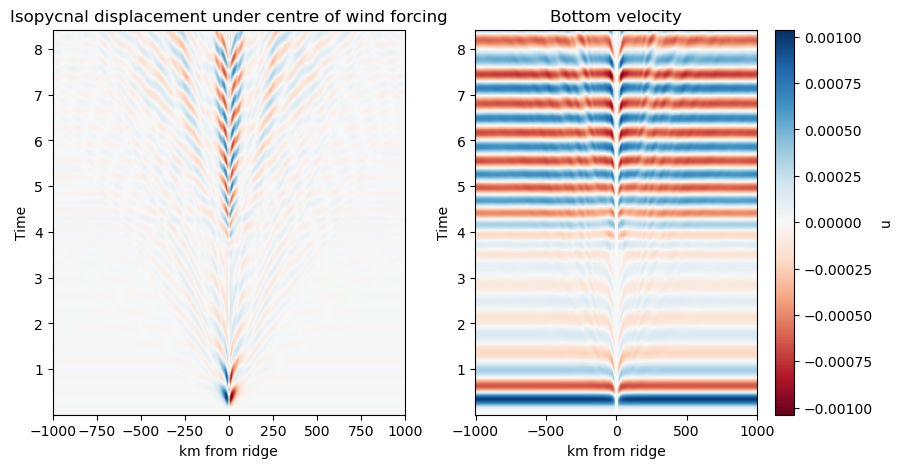

In [27]:
e = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/test_short_xextent/archive/output00*/e_10min.nc",decode_times=False,decode_cf=False).e.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
u = xr.open_mfdataset("/home/149/ab8992/bottom_near_inertial_waves/revision/test_short_xextent/archive/output00*/u_10min.nc",decode_times=False,decode_cf=False).u.isel(yh = slice(249,251),time = slice(0,1212)).mean("yh")
e = e.assign_coords({"time":e.time.values / (60 * 24)})
u = u.assign_coords({"time":u.time.values / (60 * 24)})
fig,ax = plt.subplots(1,2,figsize=(10,5))

e.isel(zi = -5).plot(cmap = "RdBu",add_colorbar = False,ax = ax[0])
u.isel(zl = -1).plot(cmap = "RdBu",ax = ax[1])

ax[0].set_ylabel("Days")
ax[0].set_xlabel("km from ridge")
ax[0].set_title("Isopycnal displacement under centre of wind forcing")
ax[1].set_ylabel("Time")
ax[1].set_xlabel("km from ridge")
ax[1].set_title("Bottom velocity")